In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = [
            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/500mM_sucrose/7sec/rnai/control/*',
            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/500mM_sucrose/7sec/rnai/experimental/*',

            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/sucrose/500mM_sucrose/60sec/rnai/{Gr64f-G4}{+};{+}{+}/raw/*.ASC',
            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/sucrose/500mM_sucrose/60sec/rnai/{Gr64f-G4}{HisCl1RNAi};{+}{+}/raw/*.ASC',

            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/500mM_sucrose/7sec/mutant/control/*',
            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/500mM_sucrose/7sec/mutant/experimental/*',

            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/100mM_sucrose/7sec/rnai/control/*',
            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/100mM_sucrose/7sec/rnai/experimental/*',

            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/100mM_sucrose/7sec/mutant/control/*',
            #  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/100mM_sucrose/7sec/mutant/experimental/*',
            # '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/no His/raw/*.ASC',
            # '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/10 mM His/raw/*.ASC',
            # '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/50 mM His/raw/*.ASC',


             '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/*.ASC',
             '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/SUC+10 mM His/raw/*.ASC',
             '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/SUC+50 mM His/raw/*.ASC',



             ]



In [3]:
fnames = []
for i in range(len(file_path)):
    fname = glob.glob(file_path[i])
    fnames.append(fname)
fnames

[['/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/2_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/3_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/6_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/5_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/4_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/7_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/8_500 mM SUC_w1118_L4.ASC',
  '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/2_500 mM SUC

/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/2_500 mM SUC_w1118_L4.ASC
1178
R² = 0.9180227204902927
Plot saved: /content/drive/My Drive/00_project/11_electrophysiology/HisCl1/sucrose/500mM_sucrose/60sec/rnai/outputexp-fit_2_500 mM SUC_w1118_L4.svg


KeyboardInterrupt: 

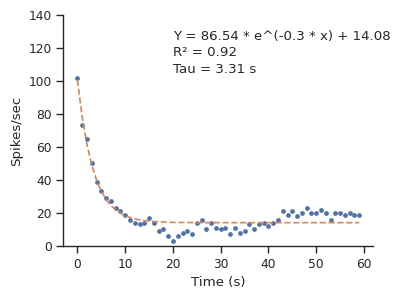

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.signal import find_peaks
import seaborn as sns


# Set the "paper" and "white" styles for Seaborn
sns.set(style="ticks", context="paper")

path_to_save_plots = '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/sucrose/500mM_sucrose/60sec/rnai/output'


bin_spikes_list = []
group_list = []
trial_list = []
for g, groups in enumerate(fnames):
    for t, trial in enumerate(groups):
        file_path = fnames[g][t]
        print(file_path)

        timestamps = []
        values = []

        with open(file_path, 'r') as file:
            lines = file.readlines()[6:]  # ignore first 6 lines

        for line in lines:
            time_str, value_str = line.strip().split('\t')
            time = float(time_str)
            value = float(value_str)
            timestamps.append(time)
            values.append(value)

        timestamps = np.array(timestamps)
        values = np.array(values)

        # Given parameters
        rec_factor = 465.462670
        ext_amp = 10
        min_voltage = -10.0  # Minimum analog voltage (-10 V)
        max_voltage = 10.0   # Maximum analog voltage (+10 V)
        resolution = 16      # Resolution in bits

        # Calculate voltage step size
        voltage_range = max_voltage - min_voltage
        voltage_step = voltage_range / (2 ** resolution - 1)

        # Convert digital value to analog voltage
        values = (values * voltage_step) / rec_factor / ext_amp # analog output to voltage(V)
        values = values * 1000 # V to mV

        # Set threshold:
        std_noise = np.median(np.abs(values)) / 0.6745
        thr = 5 * std_noise
        max_thr = 20 * std_noise

        # Negative thresholding:
        peaks, _ = find_peaks(-values,
                              height=thr,
                              distance=50,
                            #   prominence=1,
                              )

        spike_train = timestamps[peaks]

        # ########### Generate Raw Spikes ###########

        # # Create and save the plot
        # plt.figure(figsize=(10, 3))
        # plt.plot(timestamps, values,
        #         #  label='Signal',
        #          lw=0.1, color='k')
        # plt.scatter(spike_train, [values[p] for p in peaks], color='red', marker='x', label='Detected Spikes')
        # plt.xlabel(None)
        # plt.ylabel(None)
        # plt.ylim(-1.5, 1.5)  # Set y-axis limits
        # plt.xlim(1.05, 1.55)

        # # plt.title('Detected Spikes')
        # # plt.legend()

        # # Remove tick labels and plot frame
        # plt.tick_params(axis='both', which='both', bottom=False, top=False,
        #                 left=False, right=False, labelbottom=False, labelleft=False)
        # sns.despine(left=True, bottom=True, right=True, top=True)  # Remove the plot frame

        # # # Add scale bars
        # # x1, x2 = [60, 60], [-1.4, -0.9]
        # # y1, y2 = [60, 60-5], [-1.4, -1.4]
        # # plt.plot(x1, x2, c='k', lw=1)
        # # plt.plot(y1, y2, c='k', lw=1)
        # # plt.text(57, -1.6, '5s', fontsize=8)
        # # plt.text(60.5, -1.35, '0.5mV', rotation='vertical', fontsize=8)

        # # # Add scale bars
        # # x1, x2 = [10, 10], [-1.4, -0.9]
        # # y1, y2 = [10, 10-0.5], [-1.4, -1.4]
        # # plt.plot(x1, x2, c='k', lw=1)
        # # plt.plot(y1, y2, c='k', lw=1)
        # # plt.text(9.5, -1.6, '500ms', fontsize=8)
        # # plt.text(10.1, -1.35, '0.5mV', rotation='vertical', fontsize=8)

        # # Save the plot as a PNG file
        # # Extract the file name and create the new file name
        # file_name = 'raw_spike_' + file_path.split('/')[-1][:-3] + 'png'
        # plot_path = path_to_save_plots + file_name
        # # print('Plot saved: ' + plot_path)
        # # plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        # plt.show()
        # plt.close()  # Close the current plot to avoid overlap in next iteration

        ########### Generate Raw Spikes ###########

        if len(spike_train) > 0:
            spike_train = spike_train - spike_train[0]
            spike_train = spike_train[spike_train<=61]
            # spike_train = spike_train[spike_train<=10]
            # spike_train = spike_train[(spike_train>=0.05) & (spike_train<=0.5)]
            print(len(spike_train))



        # ########### Spike sorting and plot ###########

        # spike_values_list = []
        # for peak_index in peaks:
        #     if peak_index >= 35 and peak_index + 36 < len(values):
        #         spike_values = values[peak_index - 35:peak_index + 36]
        #         spike_values_list.append(spike_values)

        # # Create a line plot for all stored spike values
        # barycenter = np.array(spike_values_list[3:]).mean(axis=0)
        # plt.figure(figsize=(4, 4))
        # for spike_values in spike_values_list[3:]:
        #     plt.plot(range(len(spike_values)), spike_values, alpha=0.05, c='k')
        # plt.plot(range(len(spike_values)), barycenter, c='c')
        # plt.xlabel(None)
        # plt.ylabel(None)
        # plt.ylim(-1.5, 1.5)

        # # Add scale bars
        # x1, x2 = [68, 56], [-1, -1]
        # y1, y2 = [68, 68], [-1, -0.5]
        # plt.plot(x1, x2, c='k', lw=1)
        # plt.plot(y1, y2, c='k', lw=1)
        # plt.text(59, -1.15, '1ms', fontsize=8)
        # plt.text(69.5, -0.85, '0.5mV', rotation='vertical', fontsize=8)

        # # Remove tick labels and plot frame
        # plt.tick_params(axis='both', which='both', bottom=False, top=False,
        #                 left=False, right=False, labelbottom=False, labelleft=False)
        # sns.despine(left=True, bottom=True, right=True, top=True)  # Remove the plot frame

        # # Save the plot as a PNG file
        # # Extract the file name and create the new file name
        # file_name = 'sorted-spike_' + file_path.split('/')[-1][:-3] + 'png'
        # plot_path = path_to_save_plots + file_name
        # print('Plot saved: ' + plot_path)
        # plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        # plt.show()
        # plt.close()  # Close the current plot to avoid overlap in next iteration

        # ########### Spike sorting and plot ###########





        ########### Exponential fit ###########

        rec_time = 61 # total recording time in sec
        bin_edges = np.arange(rec_time)

        # Use histogram to bin count events
        bin_spikes, _ = np.histogram(spike_train, bins=bin_edges)
        bin_spikes_list.append(bin_spikes)
        group_list.append(g)
        trial_list.append(t)

        def monoExp(x, m, t, b):
            return m * np.exp(-t * x) + b

        # perform the fit
        p0 = (2000, .1, 50) # start with values near those we expect
        params, cv = scipy.optimize.curve_fit(monoExp, bin_edges[:-1], bin_spikes, p0, maxfev=5000)
        m, t, b = params
        sampleRate = 1 # Hz
        tauSec = (1 / t) / sampleRate

        # determine quality of the fit
        squaredDiffs = np.square(bin_spikes - monoExp(bin_edges[:-1], m, t, b))
        squaredDiffsFromMean = np.square(bin_spikes - np.mean(bin_spikes))
        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
        print(f"R² = {rSquared}")

        # plot the results
        plt.figure(figsize=(4, 3))
        plt.plot(bin_edges[:-1], bin_spikes, '.', label="data")
        plt.plot(bin_edges[:-1], monoExp(bin_edges[:-1], m, t, b), '--', label="fitted")
        plt.xlabel('Time (s)')
        plt.ylabel('Spikes/sec')
        plt.ylim(0, 140)
        plt.text(20, 125, f"Y = {np.round(m,2)} * e^(-{np.round(t,2)} * x) + {np.round(b,2)}")
        plt.text(20, 115, f"R² = {np.round(rSquared,2)}")
        plt.text(20, 105, f"Tau = {np.round(tauSec,2)} s")
        sns.despine()  # Remove the plot frame

        # Save the plot as a PNG file
        # Extract the file name and create the new file name
        file_name = 'exp-fit_' + file_path.split('/')[-1][:-3] + 'svg'
        plot_path = path_to_save_plots + file_name
        print('Plot saved: ' + plot_path)
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()  # Close the current plot to avoid overlap in next iteration

        # inspect the parameters
        print(f"Y = {m} * e^(-{t} * x) + {b}")
        print(f"Tau = {tauSec} s")

        ########### Exponential fit ###########


        # ########### ISI and coefficient of variation ###########

        # # Calculate ISI
        # isi = np.diff(spike_train)

        # # Compute CV of ISI
        # cv = np.std(isi) / np.mean(isi)

        # # Print CV value
        # print("Coefficient of Variation (CV) of ISI:", cv)

        # # Plot the spike train
        # plt.figure(figsize=(4, 3))
        # plt.hist(isi, bins=50, range=(0, 1), histtype='stepfilled',)
        # plt.xlabel('Inter-spike interval (s)')
        # plt.ylabel('Count')
        # plt.ylim(0, 400)
        # plt.xlim(0, 0.8)
        # sns.despine()  # Remove the plot frame
        # plt.text(0.6, 400, f"CV = {np.round(cv,2)}")

        # # Save the plot as a PNG file
        # # Extract the file name and create the new file name
        # file_name = 'coeff-var_' + file_path.split('/')[-1][:-3] + 'svg'
        # plot_path = path_to_save_plots + file_name
        # print('Plot saved: ' + plot_path)
        # plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        # plt.show()
        # plt.close()  # Close the current plot to avoid overlap in next iteration

        # ########### ISI and coefficient of variation ###########











     Spike_Count  Time_Second  Group  Trial
0             84            0      0      0
1             58            1      0      0
2             32            2      0      0
3             23            3      0      0
4             14            4      0      0
..           ...          ...    ...    ...
715            6           55      1      5
716            9           56      1      5
717            5           57      1      5
718            5           58      1      5
719            5           59      1      5

[720 rows x 4 columns]
Plot saved: /content/drive/My Drive/00_project/11_electrophysiology/HisCl1/sucrose/500mM_sucrose/60sec/rnai/output60sec_Gr64f_HisCl1 RNAi_5.svg


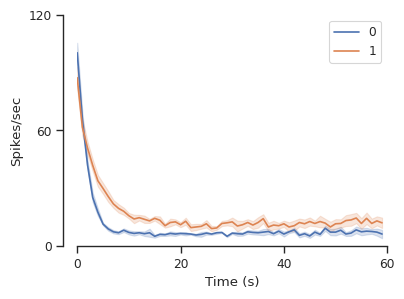

In [ ]:
# Create a list to hold the reshaped data
reshaped_data = []

# Iterate through each spike array and create rows for the DataFrame
for idx, spikes in enumerate(bin_spikes_list):
    for second, spike_count in enumerate(spikes):
        reshaped_data.append({
            'Spike_Count': spike_count,
            'Time_Second': second,  # Start time from 0
            'Group': group_list[idx],
            'Trial': trial_list[idx]
        })

# Create a DataFrame from the reshaped data
df = pd.DataFrame(reshaped_data)

# Print the DataFrame
print(df)

# Create line plots for each group using Seaborn
# sns.set(style="darkgrid")
plt.figure(figsize=(4, 3))
sns.lineplot(data=df, x='Time_Second', y='Spike_Count', hue='Group', errorbar='se')
plt.ylim(0, 120)
plt.xlim(0, 60)

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Spikes/sec')

# Set y-axis tick intervals to every 10 units
plt.yticks(np.arange(0, 125, step=60))
plt.xticks(np.arange(0, 65, step=20))
sns.despine(offset={'left':10},
            trim=True)

# Show the plot
plt.legend()
# Extract the file name and create the new file name
file_name = '60sec_' + file_path.split('/')[-1][:-3] + 'svg'
plot_path = path_to_save_plots + file_name
print('Plot saved: ' + plot_path)
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np

# Assuming 'timestamps' is your numpy array of event timestamps
timestamps = np.array([1.5, 2.2, 2.7, 3.8, 3.9, 4.5, 6.2, 7.0, 8.5, 8.9])

# Calculate the bin edges for 1-second intervals
bin_edges = np.arange(np.floor(timestamps.min()), np.ceil(timestamps.max()) + 2, 1)
bin_edges = np.arange(10)
# Use histogram to bin count events
hist, _ = np.histogram(timestamps, bins=bin_edges)

print(hist)
bin_edges

[0 1 2 2 1 0 1 1 2]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
spike_train

array([ 0.993833,  1.0105  ,  1.017667,  1.021917,  1.03175 ,  1.037083,
        1.048917,  1.057   ,  1.06375 ,  1.0705  ,  1.07925 ,  1.08925 ,
        1.093833,  1.1035  ,  1.107833,  1.118167,  1.127583,  1.134917,
        1.141167,  1.15025 ,  1.159   ,  1.16975 ,  1.18125 ,  1.19375 ,
        1.207667,  1.220417,  1.232083,  1.243   ,  1.255   ,  1.26475 ,
        1.277167,  1.290583,  1.300917,  1.312167,  1.327417,  1.340833,
        1.35375 ,  1.366917,  1.383583,  1.399917,  1.41125 ,  1.427083,
        1.43775 ,  1.450667,  1.46575 ,  1.479167,  1.490583,  1.503083,
        1.515333,  1.533333,  1.547333,  1.56075 ,  1.574167,  1.59375 ,
        1.6135  ,  1.63    ,  1.6445  ,  1.65925 ,  1.674417,  1.69225 ,
        1.70775 ,  1.719667,  1.732833,  1.749167,  1.76575 ,  1.780083,
        1.8005  ,  1.815083,  1.841667,  1.857583,  1.877   ,  1.896417,
        1.91375 ,  1.930667,  1.94625 ,  1.980583,  1.99825 ,  2.028083,
        2.055833,  2.075833,  2.095333,  2.114333, 

In [ ]:
np.diff(spike_train).mean()

0.13002069762419005

(array([46., 78., 24., 25., 18., 18., 14., 10., 14.,  6., 10.,  6., 11.,
         5.,  7.,  9.,  4.,  4.,  8.,  5.,  8., 10.,  8.,  9.,  7.,  4.,
         6.,  5.,  6.,  0.,  3.,  2.,  4.,  5.,  4.,  3.,  1.,  1.,  4.,
         3.,  5.,  2.,  3.,  4.,  5.,  1.,  0.,  1.,  1.,  0.,  3.,  3.,
         1.,  0.,  1.,  1.,  3.,  1.,  2.,  1.,  0.,  3.,  2.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.006  , 0.01434, 0.02268, 0.03102, 0.03936, 0.0477 , 0.05604,
        0.06438, 0.07272, 0.08106, 0.0894 , 0.09774, 0.10608, 0.11442,
        0.12276, 0.1311 , 0.13944, 0.14778, 0.15612, 0.16446, 0.1728 ,
        0.18114, 0.18948, 0.19782, 0.20616, 0.2145 , 0.22284, 0.23118,
        0.23952, 0.24786, 0.2562 , 0.26454, 0.27288, 0.28122, 0.28956,
        0.2979 , 0.30624, 0.31458, 0.32292, 0.33126, 0.3396 , 0.34794,
        

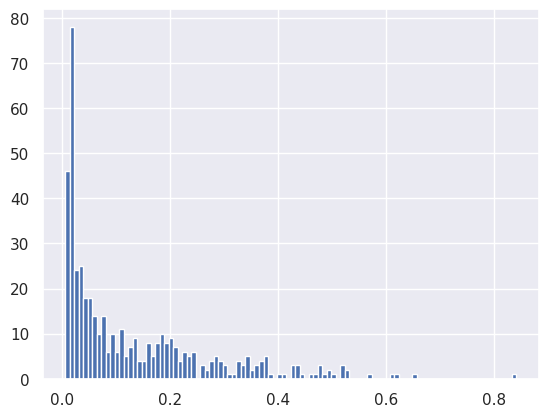

In [ ]:
plt.hist(np.diff(spike_train), bins=100)

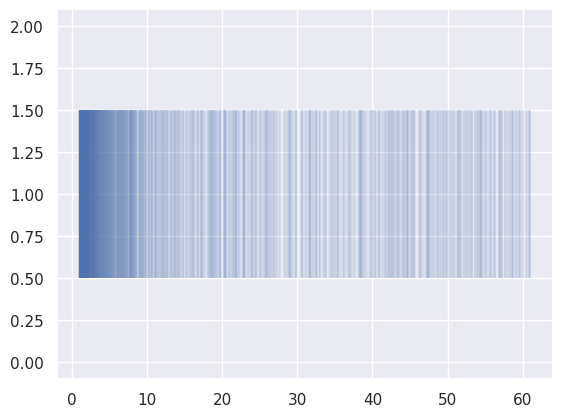

In [ ]:
plt.eventplot(spike_train,alpha=0.1
               )

5366.93847294292
[42]


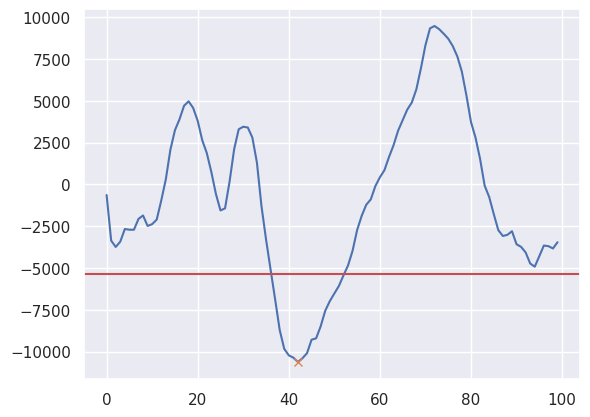

In [ ]:

point = 12669
interval = 50
val = values[point-interval:point+interval]
print(thr)
plt.plot(val)
# negative thresholding:
peaks, _ = find_peaks(-val, height=thr,
                      distance=50,
                      prominence=thr*2
                      )
# # positive thresholding
# peaks, _ = find_peaks(val, height=thr,
#                       width=10,
#                       distance=100,
#                       prominence=20000
#                       )
print(peaks)
plt.plot(peaks, val[peaks], "x")
plt.axhline(y = -thr, color = 'r', linestyle = '-')
plt.show()

The spike count rate was 53310.0 Hz


Text(0, 0.5, 'Frequency')

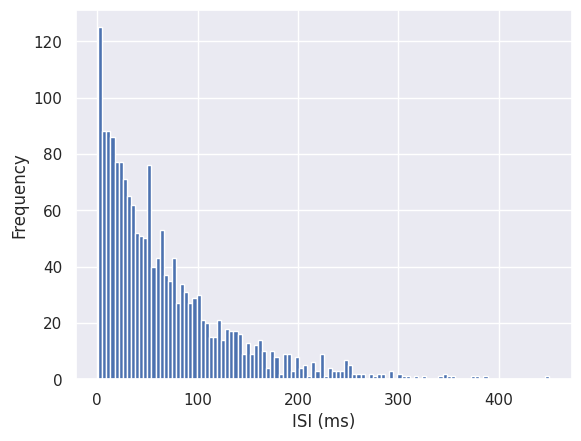

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the probability of a spike occurring in each interval
prob = 15/1000
# We are sampling 1000 times/s and the neuron fires 15x/s on average

# Initiate data structure to hold the spike train
timePoints = 2 * 60 * 1000 # 2 minutes * 60s/minute * 1000 samples/second
poissonNeuron = np.zeros(timePoints)

# Create a loop to simulate each time point
for i in range(len(poissonNeuron)):
  # conditional statement to asssess if spike has occurred
  if np.random.rand() < prob: # if a random number between 0 and 1 is < prob
    # store a 1 in poissonNeuron. This means the neuron has fired
    poissonNeuron[i] = 1

# Compute the overall spike count rate
numSpikes = sum(poissonNeuron)
# total number of action potentials in 2 minutes
print('The spike count rate was {} Hz'.format(numSpikes / 2*60))
# 2 minutes * 60s/minute

# Plot the distribution of ISIs
# Step 1: determine the time stamps of each spike
spikeTimes = np.where(poissonNeuron == 1)[0]
# Remember the difference between = and ==
# The [0] at the end is because np.where returns two arrays and we
# only need the first one

# Step 2: Initialize data structure to hold ISIs
isi = np.zeros(len(spikeTimes)-1)
# There will be one fewer ISI than the number of spikes

# Step 3: Loop through each pair of consecutive spikes, compute isi
# and store
for x in range(len(isi)):
  # Each ISI is the time between spike x and spike x+1
  isi[x] = spikeTimes[x+1] - spikeTimes[x]

# Plot the ISI distribution
plt.hist(isi, 110) # create a histogram with 110 bins
plt.xlabel('ISI (ms)')
plt.ylabel('Frequency')

3108.9696071163826


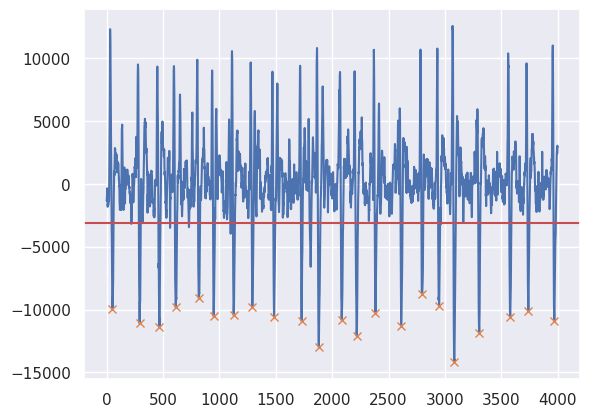

In [ ]:
from scipy.signal import find_peaks
point = 18000
interval = 2000
val = values[point-interval:point+interval]
print(thr)
plt.plot(val)
# negative thresholding:
peaks, _ = find_peaks(-val, height=-thr,
                      width=10,
                      distance=100,
                      prominence=10000
                      )
# # positive
# peaks, _ = find_peaks(val, height=thr,
#                       width=10,
#                       distance=100,
#                       prominence=20000
#                       )
plt.plot(peaks, val[peaks], "x")
plt.axhline(y = -thr, color = 'r', linestyle = '-')
plt.show()

In [ ]:
peaks

array([ 926, 1112, 1230, 1357, 1502, 1644, 1815, 1957, 2080, 2186, 2295,
       2411, 2532, 2642, 2769, 2879, 2982, 3103, 3214, 3321, 3456, 3599,
       3741, 3869, 4031, 4167, 4311, 4439, 4560, 4731, 4868, 5033, 5156,
       5275, 5405, 5535, 5660, 5848, 5969, 6103, 6263, 6413, 6589, 6732,
       6873, 6997, 7135, 7288, 7399, 7506, 7633, 7786, 7952])

In [ ]:
# Example usage
digital_value = values  # Replace with your actual 12-bit digital value
max_voltage = 10.0    # Maximum voltage in volts
resolution = 16       # 16-bit resolution

voltage = (digital_value / ((2 ** resolution) - 1)) * max_voltage
voltage

array([ 0.00503548, -0.00457771,  0.00534066, ..., -0.02395666,
       -0.01892119, -0.02136263])

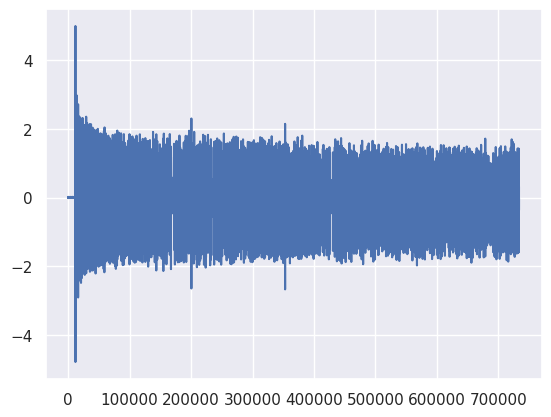

In [ ]:
plt.plot((voltage))
plt.show()

In [ ]:
df_list = []

for i in range(len(file_path)):
    fname = glob.glob(file_path[i])
    print('group_' + str(i+1))
    for j in range(len(fname)):
        print('fly ' + str(j+1))
        print(fname[j])
        ascii_grid = np.loadtxt(fname[j], skiprows=6)
        df = pd.DataFrame(ascii_grid, columns = ['time','value'])
        df['group'] = 'group_' + str(i+1)
        df['fly'] = j+1
        df = df[(df.time>=1) & (df.time<61)]
        df['time'] = df.time.values - df.time.values[0]
        df_list.append(df)
df = pd.concat(df_list)
df.reset_index(drop=True,inplace=True)
df.head()

group_1
fly 1
/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/2_500 mM SUC.ASC
fly 2
/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/1_500 mM SUC.ASC
fly 3
/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/4_500 mM SUC.ASC


<ipython-input-14-8c6cc985eee6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df.time.values - df.time.values[0]


fly 4
/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/500 mM SUC/raw/3_500 mM SUC.ASC


,time,value,group,fly
0,0.000000,-5569.0,group_1,1
1,0.000083,-5461.0,group_1,1
2,0.000167,-5090.0,group_1,1
3,0.000250,-4298.0,group_1,1
4,0.000333,-3354.0,group_1,1


In [ ]:
df.value*

,time,value,group,fly
0,0.000000,-5569.0,group_1,1
1,0.000083,-5461.0,group_1,1
2,0.000167,-5090.0,group_1,1
3,0.000250,-4298.0,group_1,1
4,0.000333,-3354.0,group_1,1
5,0.000417,-2420.0,group_1,1
6,0.000500,-1717.0,group_1,1
7,0.000583,-1308.0,group_1,1
8,0.000667,303.0,group_1,1
9,0.000750,1386.0,group_1,1


0


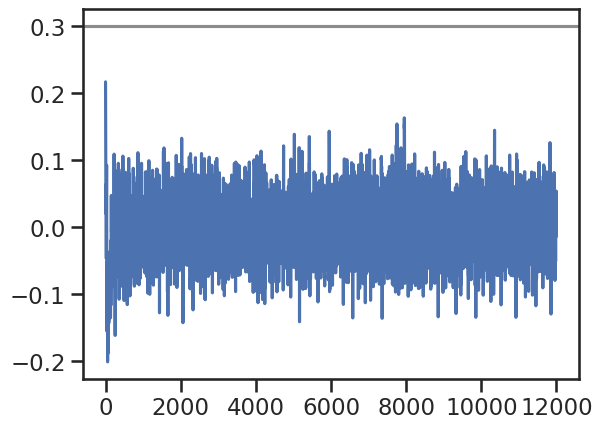

In [ ]:
from scipy.signal import find_peaks
from scipy import signal
from scipy.signal import butter, lfilter

rec_factor = 465.462670
ext_amp = 10
fs = 12000
dig_sample_rate = 2400
dig_sample_rate = 1920
low_cut = 99
high_cut = 3000
sec=0

# df[(df.group=='group_1') & (df.time>=sec) & (df.time<sec+0.2)].plot(x='time', y='value')
# df[(df.group=='group_2') & (df.time>=sec) & (df.time<sec+0.2)].plot(x='time', y='value', c='r')
sig = df[(df.group=='group_1') & (df.fly==2) & (df.time>=sec) & (df.time<sec+1)].value.values /(ext_amp*dig_sample_rate)
# /(ext_amp*dig_sample_rate)

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# sig = butter_bandpass_filter(sig, low_cut, high_cut, fs, order=5)

peaks, _ = find_peaks(sig, height=0.3, distance=25)
print(len(peaks))
plt.plot(sig)
plt.axhline(0.3, c='k', alpha=0.5)
plt.plot(peaks, sig[peaks], "x")

In [ ]:
event = []
for i in df.group.unique():
    print(i)
    for j in df[(df.group==i)].fly.unique():
        print(j)
        for k in range(60):
            sig = df[(df.group==i) & (df.fly==j) & (df.time>=sec+k) & (df.time<sec+k+1)].value.values /(ext_amp*dig_sample_rate)
            peaks, _ = find_peaks(sig, height=0.3, distance=25)
            event.append([i, j, k, len(peaks)])
spike_df = pd.DataFrame(event, columns=['group', 'fly', 'time', 'Hz'])
spike_df.head()

group_1
1
2
3
4
5
6
7
8
9
group_2
1
2
3
4
5
6
group_3
1
2
3
4
5
6
7


,group,fly,time,Hz
0,group_1,1,0,0
1,group_1,1,1,0
2,group_1,1,2,0
3,group_1,1,3,0
4,group_1,1,4,0


In [ ]:
spike_df.to_csv('/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/spike_raw_output_histamine_only_new.csv')
# spike_df = pd.read_csv('/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/spike_raw_output_histamine_only.csv')
spike_df

,group,fly,time,Hz
0,group_1,1,0,0
1,group_1,1,1,0
2,group_1,1,2,0
3,group_1,1,3,0
4,group_1,1,4,0
...,...,...,...,...
1315,group_3,7,55,0
1316,group_3,7,56,0
1317,group_3,7,57,0
1318,group_3,7,58,0


In [ ]:
spike_df.pivot_table(index='time', columns=['group', 'fly'], values='Hz').to_excel('/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/spike_raw_output_hist_plus_suc_new.xlsx')

<ipython-input-20-2f0147cde9c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=spike_df, x='time', y='Hz', hue='group',


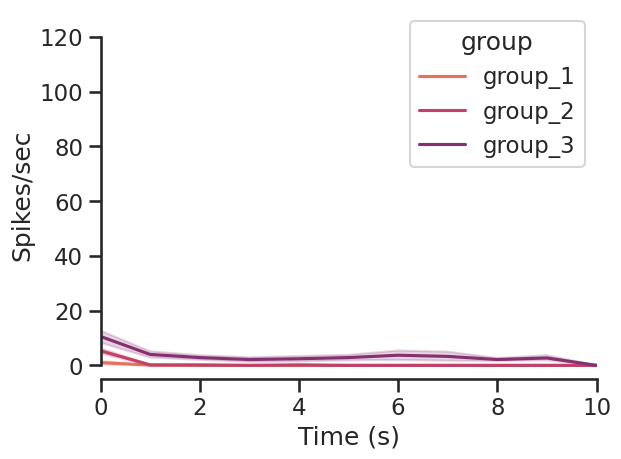

In [ ]:
sns.set_theme()
sns.set_style("ticks")
sns.set_context("talk")
fig, ax = plt.subplots()
sns.lineplot(data=spike_df, x='time', y='Hz', hue='group',
             ci=68,
            #  palette='crest',
             palette='flare',
            #  estimator=None,
            #  units='fly',
             legend=True,
             ax=ax)

ax.set(xlabel='Time (s)',
       ylabel='Spikes/sec',
       ylim=[-5, 130],
       xlim=[0, 10])
sns.despine(trim=True)
plt.savefig('/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/spike_raw_output_histamine_only_new.svg',
            transparent=True, bbox_inches='tight', pad_inches=0.0, dpi=600)
plt.show()

In [ ]:
time_spike_df = spike_df[(spike_df.time==0) | (spike_df.time==5) | (spike_df.time==10) | (spike_df.time==30) |(spike_df.time==50)]
time_spike_df.to_csv('/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/stats_spike_raw_output_histamine_only_new.csv')
# time_spike_df= pd.read_csv('/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/stats_spike_raw_output_histamine_only_new.csv')
time_spike_df

,group,fly,time,Hz
0,group_1,1,0,0
5,group_1,1,5,0
10,group_1,1,10,0
30,group_1,1,30,0
50,group_1,1,50,0
...,...,...,...,...
1260,group_3,7,0,17
1265,group_3,7,5,3
1270,group_3,7,10,0
1290,group_3,7,30,0


<ipython-input-22-54f6aecc049c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(data=data,


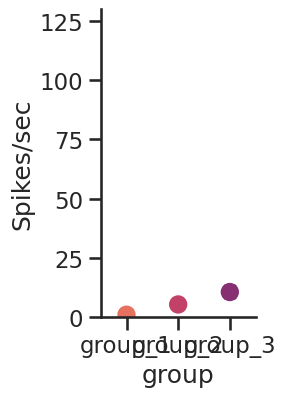

<ipython-input-22-54f6aecc049c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(data=data,


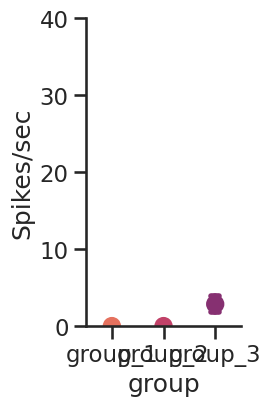

<ipython-input-22-54f6aecc049c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(data=data,


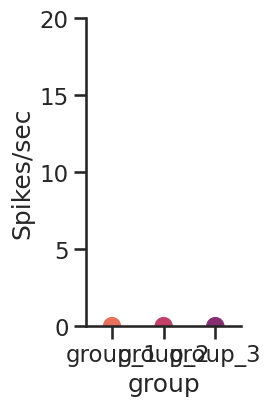

<ipython-input-22-54f6aecc049c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(data=data,


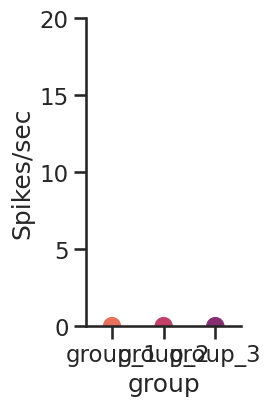

<ipython-input-22-54f6aecc049c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(data=data,


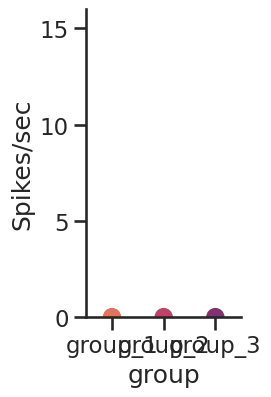

In [ ]:
for i in range(5):
    time_select = [0, 5, 10, 30, 50]
    data = time_spike_df[time_spike_df.time == time_select[i]]

    sns.set(style='ticks', context='talk')

    fig, ax = plt.subplots(figsize=(2, 4))
    sns.pointplot(data=data,
                x='group',
                y='Hz',
                ci=68,
                capsize=0.15,
                join=False,
                # palette='crest',
                palette='flare',
                )
    ylim_max = [130, 40, 20, 20, 16]
    ax.set(
            ylim=[0, ylim_max[i]],
            ylabel='Spikes/sec',
        #    yticks=[0, 20, 40, 60, 80]
    )
    sns.despine()

    file_name = str(time_select[i]) + 'sec_compare_hist-only_60sec_new'
    fig_path = '/content/drive/My Drive/00_project/11_electrophysiology/HisCl1/histamine+sucrose/output/' + file_name + '.svg'

    plt.savefig(fig_path, format='svg' , transparent=True, bbox_inches='tight', pad_inches=0.0, dpi=600)

    plt.show()